# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 2 hours**. For this time interval, using the values of the **4 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train a Boosting model for the task. Choose the model based on the number, and type of features available.**



Features:

* Date: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

SolarPower

## Dataset links:
* [DS1](https://drive.google.com/file/d/1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA/view?usp=sharing)
* [DS2](https://drive.google.com/file/d/1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD/view?usp=sharing)

## Read the datasets

In [ ]:
import pandas as pd

In [ ]:
data1 = pd.read_csv("power_consumption_g3_feat.csv")

In [ ]:
data2 = pd.read_csv("power_consumption_g3.csv")

## Merge the datasets (and pre-processing if needed)

In [ ]:
data1.head(3)

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322


In [ ]:
data1.Date = pd.to_datetime(data1.Date)
data1 = data1.set_index('Date')
data1 = data1.sort_index()
data1.head(3)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Date,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100


In [ ]:
data2.Date = pd.to_datetime(data2.Date)
data2 = data2.set_index('Date')
data2 = data2.sort_index()
data2.head(3)

,SolarPower
Date,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127


In [ ]:
data1 = data1.groupby(pd.Grouper(freq='120min')).sum()

In [ ]:
data2 = data2.groupby(pd.Grouper(freq='120min')).sum()

In [ ]:
data = pd.merge(data1, data2, left_index=True, right_index=True)

In [ ]:
data.head(3)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,64.621,837.7,0.983,0.722,1.268,323131.13924
2017-01-01 02:00:00,60.352,936.1,0.991,0.737,1.621,257365.06328
2017-01-01 04:00:00,59.036,895.7,0.980,0.743,1.450,247698.22784


In [ ]:
data.isna().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [ ]:
columns = data.columns

In [ ]:
for i in range(1, 5):
  for col in columns:
    data[f'{col}_prev_{i}'] = data[col].shift(i, axis=0)

In [ ]:
data.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'SolarPower', 'Temperature_prev_1', 'Humidity_prev_1',
       'WindSpeed_prev_1', 'GeneralDiffuseFlows_prev_1', 'DiffuseFlows_prev_1',
       'SolarPower_prev_1', 'Temperature_prev_2', 'Humidity_prev_2',
       'WindSpeed_prev_2', 'GeneralDiffuseFlows_prev_2', 'DiffuseFlows_prev_2',
       'SolarPower_prev_2', 'Temperature_prev_3', 'Humidity_prev_3',
       'WindSpeed_prev_3', 'GeneralDiffuseFlows_prev_3', 'DiffuseFlows_prev_3',
       'SolarPower_prev_3', 'Temperature_prev_4', 'Humidity_prev_4',
       'WindSpeed_prev_4', 'GeneralDiffuseFlows_prev_4', 'DiffuseFlows_prev_4',
       'SolarPower_prev_4'],
      dtype='object')

In [ ]:
data = data.drop(columns = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows'])

In [ ]:
data.columns

Index(['SolarPower', 'Temperature_prev_1', 'Humidity_prev_1',
       'WindSpeed_prev_1', 'GeneralDiffuseFlows_prev_1', 'DiffuseFlows_prev_1',
       'SolarPower_prev_1', 'Temperature_prev_2', 'Humidity_prev_2',
       'WindSpeed_prev_2', 'GeneralDiffuseFlows_prev_2', 'DiffuseFlows_prev_2',
       'SolarPower_prev_2', 'Temperature_prev_3', 'Humidity_prev_3',
       'WindSpeed_prev_3', 'GeneralDiffuseFlows_prev_3', 'DiffuseFlows_prev_3',
       'SolarPower_prev_3', 'Temperature_prev_4', 'Humidity_prev_4',
       'WindSpeed_prev_4', 'GeneralDiffuseFlows_prev_4', 'DiffuseFlows_prev_4',
       'SolarPower_prev_4'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [ ]:
X, Y = data.drop(columns="SolarPower", axis=1), data.SolarPower

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
params = {
    "n_estimators": np.arange(50, 200, 100),
    "max_depth": [3, 5, 7]
}

In [ ]:
grid_search = GridSearchCV(XGBRegressor(), cv=5, param_grid=params)

In [ ]:
grid_search.fit(X, Y, verbose=2)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': array([ 50, 150])})

In [ ]:
estimator = grid_search.best_estimator_

In [ ]:
estimator.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = estimator.predict(X_test)

In [ ]:
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(495432648.77838105, 16952.407014061784, 0.9016149179087795)

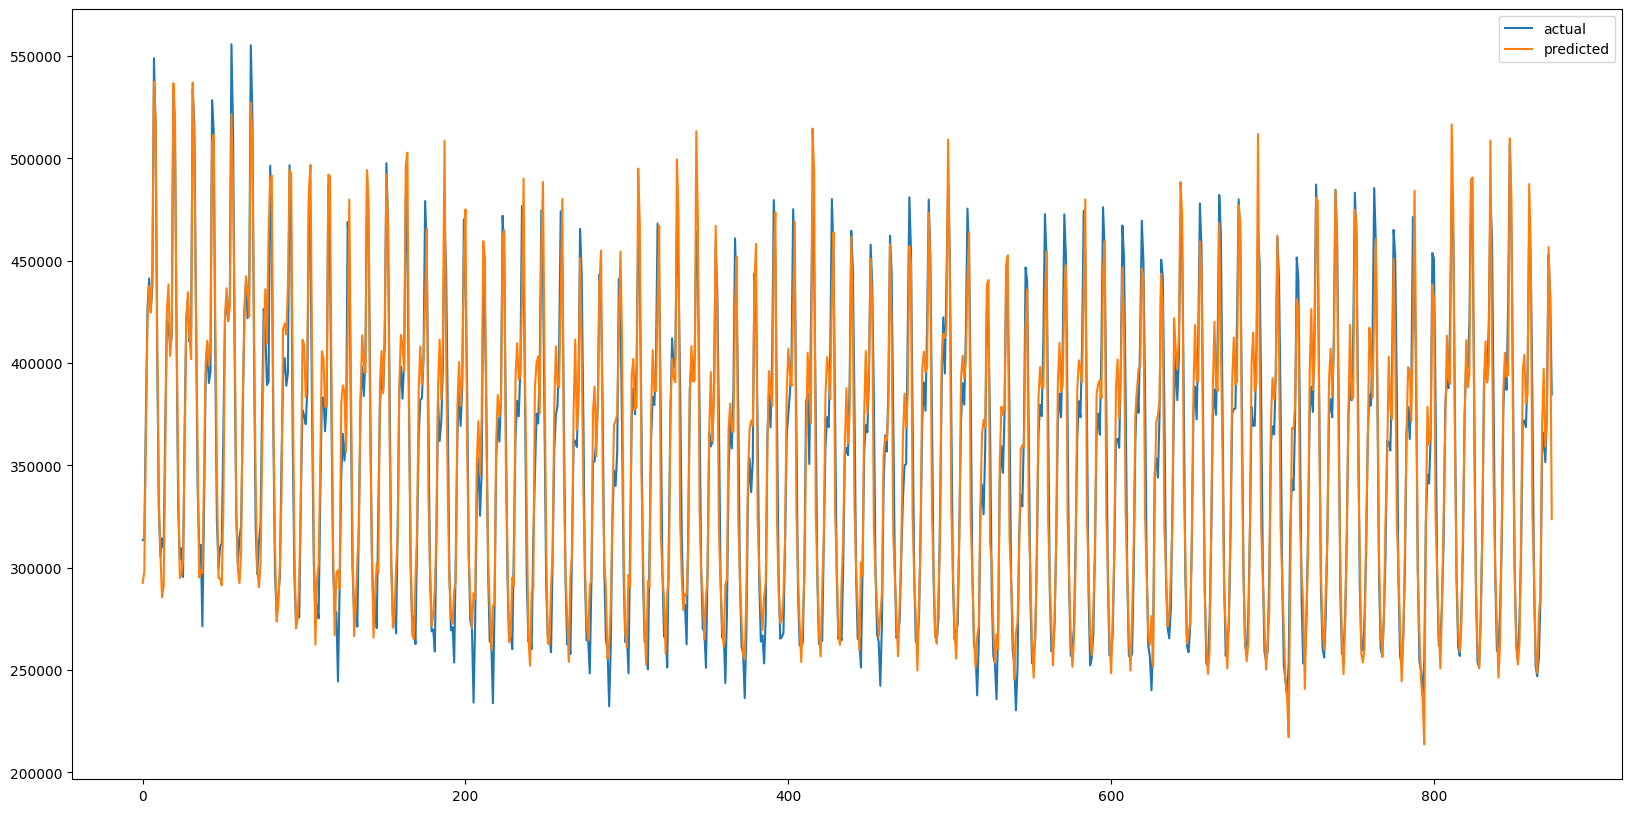

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()

## Group the datasets into time intervals of 2 hours

## Create lags

# Split the dataset into 80% training and 20% testing datasets

## Create the model, pre-process the data and make it suitable for training

## Perofrm hyper-parameter optimization with a 5-fold cross validation.

Important: Do not use many values for the hyper-parameters due to time constraints.

KEEP IN MIND THE DATASET IS TIME-SERIES.

## Fit the model with the best parameters on the training dataset

## Calculate the adequate metrics on the testing dataset

## Visualize the targets against the predictions